# Proyek Analisis Data: Bike Sharing Datasheet

*   Nama: Fadli Shidqi Firdaus
*   Email: fadlishidqifirdaus@gmail.com
*   ID Dicoding: fadli26

## Pertanyaan yang akan di analisis

* Di hari apa pengguna paling sering meminjam sepeda, dan pada hari apa permintaan paling sedikit terjadi?
* Pada jam berapa menunjukkan lonjakan terbesar dalam jumlah penyewaan sepeda?
* Musim mana yang cenderung paling populer untuk penyewaan sepeda berdasarkan volume penggunaan?
* Apakah ada hubungan antara penyewa sepeda dengan suhu dan cuaca?
* Lebih banyak mana user yang berlangganan atau tidak berlangganan?




In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset characteristics
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## Data Wrangling

In [63]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [64]:
#Menampilkan 5 data teratas dari data day
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
#Menampilkan 5 data teratas dari data hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

In [66]:
# Memeriksa info dari dataset hari dan jam untuk melihat tipe data dan apakah ada missing values
print("Info Data Day:")
day_df.info()

print("\nInfo Data Hour:")
hour_df.info()

Info Data Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info Data Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entri

In [67]:
# Mengecek apakah ada nilai yang hilang (missing values)
print("Cek nilai yang hilang dalam data Day:")
day_df.isnull().sum()

Cek nilai yang hilang dalam data Day:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [68]:
print("Cek nilai yang hilang dalam data Hour:")
hour_df.isnull().sum()

Cek nilai yang hilang dalam data Hour:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [69]:
#Cek duplikasi di data day dan hour
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [70]:
# Menampilkan statistik deskriptif untuk semua kolom dalam dataset Day
print(day_df.describe(include="all"))

           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN 

In [71]:
# Menampilkan statistik deskriptif untuk semua kolom dalam dataset Hour
print(hour_df.describe(include="all"))

           instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count  

## Cleaning Data

* Menghapus kolom data yang tidak diperlukan
* Mengubah nama kolom untuk memperjelas data
* Mengubah tipe data kolom 'date_day' menjadi datetime
* Melakukan perubahan tipe data pada kolom
* Konversi data yang diperlukan

In [72]:
# Menghapus kolom yang tidak diperlukan
day_df = day_df.drop(columns=['workingday', 'instant', 'atemp', 'holiday'])
hour_df = hour_df.drop(columns=['workingday', 'instant', 'atemp', 'holiday'])

In [73]:
# Mengubah nama kolom untuk memperjelas data
day_df.rename(columns={
    'yr': 'year',
    'dteday': 'date_day',
    'mnth': 'month',
    'weekday': 'day',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_total',
    'hum': 'humidity',
    'temp': 'temperature',
    'casual': 'casual_users',
    'registered': 'registered_users',
}, inplace=True)

# Menampilkan nama kolom yang sudah diperbarui
print(day_df.columns)


Index(['date_day', 'season', 'year', 'month', 'day', 'weather_situation',
       'temperature', 'humidity', 'wind_speed', 'casual_users',
       'registered_users', 'count_total'],
      dtype='object')


In [74]:
# Mengubah nama kolom untuk memperjelas data
hour_df.rename(columns={
    'yr': 'year',
    'dteday': 'date_day',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_total',
    'hum': 'humidity',
    'temp': 'temperature',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'hr': 'hour',
    'weekday': 'day',
}, inplace=True)

# Menampilkan nama kolom yang sudah diperbarui
print(hour_df.columns)


Index(['date_day', 'season', 'year', 'month', 'hour', 'day',
       'weather_situation', 'temperature', 'humidity', 'wind_speed',
       'casual_users', 'registered_users', 'count_total'],
      dtype='object')


In [75]:
# Mengubah tipe data kolom 'date_day' menjadi datetime untuk day_df dan hour_df
day_df['date_day'] = pd.to_datetime(day_df['date_day'])
hour_df['date_day'] = pd.to_datetime(hour_df['date_day'])

In [76]:
# Melakukan perubahan tipe data pada kolom
columns = ['season', 'month', 'day', 'weather_situation']

# Mengonversi kolom yang relevan menjadi tipe "category" untuk day_df dan hour_df
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_day           731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    int64         
 3   month              731 non-null    category      
 4   day                731 non-null    category      
 5   weather_situation  731 non-null    category      
 6   temperature        731 non-null    float64       
 7   humidity           731 non-null    float64       
 8   wind_speed         731 non-null    float64       
 9   casual_users       731 non-null    int64         
 10  registered_users   731 non-null    int64         
 11  count_total        731 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 49.7 KB


In [77]:
#Konversi Musim
season_mapping = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Salju'
}

day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

In [78]:
#Konversi Cuaca
weather_mapping = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan_Salju_Ringan',
    4: 'Hujan_Salju_Lebat'
}

day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)


In [79]:
#Konversi Bulan
month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

In [80]:
#Konversi Hari
day_mapping = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

day_df['day'] = day_df['day'].map(day_mapping)
hour_df['day'] = hour_df['day'].map(day_mapping)

In [81]:
#Konversi Tahun
year_mapping = {
    0: '2011',
    1: '2012'
}

day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

In [82]:
# Mengubah kolom 'hour' menjadi format 24 jam (00:00)
hour_df['hour'] = hour_df['hour'].apply(lambda x: '{:02d}:00'.format(x))

# Menampilkan 5 baris pertama untuk memeriksa perubahan
print(hour_df[['hour']].head())

    hour
0  00:00
1  01:00
2  02:00
3  03:00
4  04:00


In [83]:
day_df.head()

,date_day,season,year,month,day,weather_situation,temperature,humidity,wind_speed,casual_users,registered_users,count_total
0,2011-01-01,Semi,2011,Januari,Sabtu,Berkabut,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Januari,Minggu,Berkabut,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Januari,Senin,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Januari,Selasa,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Januari,Rabu,Cerah,0.226957,0.436957,0.186900,82,1518,1600


In [84]:
hour_df.head()

,date_day,season,year,month,hour,day,weather_situation,temperature,humidity,wind_speed,casual_users,registered_users,count_total
0,2011-01-01,Semi,2011,Januari,00:00,Sabtu,Cerah,0.24,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Januari,01:00,Sabtu,Cerah,0.22,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Januari,02:00,Sabtu,Cerah,0.22,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Januari,03:00,Sabtu,Cerah,0.24,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Januari,04:00,Sabtu,Cerah,0.24,0.75,0.0,0,1,1


In [85]:
# Mengembalikan temperature, humidity, dan wind_speed ke nilai bulat aslinya
hour_df['temperature'] = (hour_df['temperature'] * 41).round().astype(int)
hour_df['humidity'] = (hour_df['humidity'] * 100).round().astype(int)
hour_df['wind_speed'] = (hour_df['wind_speed'] * 67).round().astype(int)

day_df['temperature'] = (day_df['temperature'] * 41).round().astype(int)
day_df['humidity'] = (day_df['humidity'] * 100).round().astype(int)
day_df['wind_speed'] = (day_df['wind_speed'] * 67).round().astype(int)

In [86]:
# Fungsi untuk mengklasifikasikan kelembapan menjadi Kering, Ideal, atau Lembab
def humidity_class(humidity):
    if humidity < 30:
        return "Kering"
    elif 30 <= humidity < 60:
        return "Ideal"
    else:
        return "Lembab"

# Menerapkan fungsi ke kolom 'humidity' di day_df dan hour_df
day_df["humidity_category"] = day_df["humidity"].apply(humidity_class)
hour_df["humidity_category"] = hour_df["humidity"].apply(humidity_class)

In [87]:
# Fungsi untuk mengklasifikasikan kecepatan angin menjadi Rendah, Sedang, atau Tinggi
def wind_speed_class(wind_speed):
    if wind_speed < 10:
        return "Rendah"
    elif 10 <= wind_speed < 20:
        return "Sedang"
    else:
        return "Tinggi"

# Menerapkan fungsi ke kolom 'windspeed' di day_df dan hour_df
day_df["wind_speed_category"] = day_df["wind_speed"].apply(wind_speed_class)
hour_df["wind_speed_category"] = hour_df["wind_speed"].apply(wind_speed_class)


In [88]:
day_df.head()

,date_day,season,year,month,day,weather_situation,temperature,humidity,wind_speed,casual_users,registered_users,count_total,humidity_category,wind_speed_category
0,2011-01-01,Semi,2011,Januari,Sabtu,Berkabut,14,81,11,331,654,985,Lembab,Sedang
1,2011-01-02,Semi,2011,Januari,Minggu,Berkabut,15,70,17,131,670,801,Lembab,Sedang
2,2011-01-03,Semi,2011,Januari,Senin,Cerah,8,44,17,120,1229,1349,Ideal,Sedang
3,2011-01-04,Semi,2011,Januari,Selasa,Cerah,8,59,11,108,1454,1562,Ideal,Sedang
4,2011-01-05,Semi,2011,Januari,Rabu,Cerah,9,44,13,82,1518,1600,Ideal,Sedang


In [89]:
hour_df.head()

,date_day,season,year,month,hour,day,weather_situation,temperature,humidity,wind_speed,casual_users,registered_users,count_total,humidity_category,wind_speed_category
0,2011-01-01,Semi,2011,Januari,00:00,Sabtu,Cerah,10,81,0,3,13,16,Lembab,Rendah
1,2011-01-01,Semi,2011,Januari,01:00,Sabtu,Cerah,9,80,0,8,32,40,Lembab,Rendah
2,2011-01-01,Semi,2011,Januari,02:00,Sabtu,Cerah,9,80,0,5,27,32,Lembab,Rendah
3,2011-01-01,Semi,2011,Januari,03:00,Sabtu,Cerah,10,75,0,3,10,13,Lembab,Rendah
4,2011-01-01,Semi,2011,Januari,04:00,Sabtu,Cerah,10,75,0,0,1,1,Lembab,Rendah


## (EDA) Exploratory Data Analysis

### Di hari apa pengguna paling sering meminjam sepeda, dan pada hari apa permintaan paling sedikit terjadi?

In [90]:
# Mengelompokkan data berdasarkan 'day' untuk mendapatkan total penyewaan
weekday_rentals = day_df.groupby('day', observed=True)['count_total'].sum().reset_index()

# Menemukan hari dengan penyewaan sepeda tertinggi
most_rentals_day = weekday_rentals.loc[weekday_rentals['count_total'].idxmax()]

# Menemukan hari dengan penyewaan sepeda terendah
least_rentals_day = weekday_rentals.loc[weekday_rentals['count_total'].idxmin()]

print("Hari dengan penyewaan sepeda tertinggi:", most_rentals_day)
print("Hari dengan penyewaan sepeda terendah:", least_rentals_day)

Hari dengan penyewaan sepeda tertinggi: day             Jumat
count_total    487790
Name: 5, dtype: object
Hari dengan penyewaan sepeda terendah: day            Minggu
count_total    444027
Name: 0, dtype: object


### Pada jam berapa menunjukkan lonjakan terbesar dalam jumlah penyewaan sepeda?

In [91]:
# Mengelompokkan data berdasarkan 'hour' untuk mendapatkan total penyewaan per jam
hourly_rentals = hour_df.groupby('hour', observed=True)['count_total'].sum().reset_index()

# Menemukan jam dengan penyewaan sepeda tertinggi
peak_hour = hourly_rentals.loc[hourly_rentals['count_total'].idxmax()]

print("Jam dengan penyewaan sepeda tertinggi:", peak_hour)

Jam dengan penyewaan sepeda tertinggi: hour            17:00
count_total    336860
Name: 17, dtype: object


### Musim mana yang cenderung paling populer untuk penyewaan sepeda berdasarkan volume penggunaan?

In [92]:
# Mengelompokkan data berdasarkan 'season' untuk mendapatkan total penyewaan per musim
season_rentals = day_df.groupby('season', observed=True)['count_total'].sum().reset_index()

# Menemukan musim dengan penyewaan sepeda tertinggi
popular_season = season_rentals.loc[season_rentals['count_total'].idxmax()]

print("Musim dengan penyewaan sepeda tertinggi:", popular_season)

Musim dengan penyewaan sepeda tertinggi: season           Gugur
count_total    1061129
Name: 2, dtype: object


### Apakah ada hubungan antara penyewa sepeda dengan suhu dan cuaca?

In [93]:
# Menghitung korelasi antara suhu dan total penyewaan sepeda
correlation_temp = day_df[['temperature', 'count_total']].corr().iloc[0, 1]
print(f"Korelasi antara suhu dan penyewaan sepeda: {correlation_temp}")

# Mengelompokkan berdasarkan 'weather_situation' untuk melihat rata-rata penyewaan sepeda per kondisi cuaca
weather_rentals = day_df.groupby('weather_situation', observed=True)['count_total'].mean().reset_index()

# Menampilkan hasil hubungan antara kondisi cuaca dan penyewaan sepeda
print("Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:")
print(weather_rentals)

# Melihat hubungan suhu dengan penyewaan sepeda
if correlation_temp != 0:
    print("Ada hubungan antara suhu dan penyewaan sepeda.")
else:
    print("Tidak ada hubungan antara suhu dan penyewaan sepeda.")


Korelasi antara suhu dan penyewaan sepeda: 0.6274660738524761
Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:
    weather_situation  count_total
0               Cerah  4876.786177
1            Berkabut  4035.862348
2  Hujan_Salju_Ringan  1803.285714
Ada hubungan antara suhu dan penyewaan sepeda.


### Lebih banyak mana user yang berlangganan atau tidak berlangganan?

In [94]:
# Mengelompokkan data berdasarkan status berlangganan dan menjumlahkan total penyewaan
subscription_rentals = day_df[['registered_users', 'casual_users']].sum().reset_index()

# Menyusun ulang data untuk memudahkan perbandingan
subscription_rentals.columns = ['user_type', 'total_rentals']

# Menampilkan hasil
print("Jumlah total penyewaan sepeda untuk pengguna terdaftar dan kasual:")
print(subscription_rentals)

# Membandingkan jumlah penyewaan
if subscription_rentals.loc[subscription_rentals['user_type'] == 'registered_users', 'total_rentals'].values[0] > \
   subscription_rentals.loc[subscription_rentals['user_type'] == 'casual_users', 'total_rentals'].values[0]:
    print("Pengguna yang berlangganan lebih banyak dibandingkan dengan pengguna kasual.")
else:
    print("Pengguna kasual lebih banyak dibandingkan dengan pengguna yang berlangganan.")

Jumlah total penyewaan sepeda untuk pengguna terdaftar dan kasual:
          user_type  total_rentals
0  registered_users        2672662
1      casual_users         620017
Pengguna yang berlangganan lebih banyak dibandingkan dengan pengguna kasual.


## Visualization Data

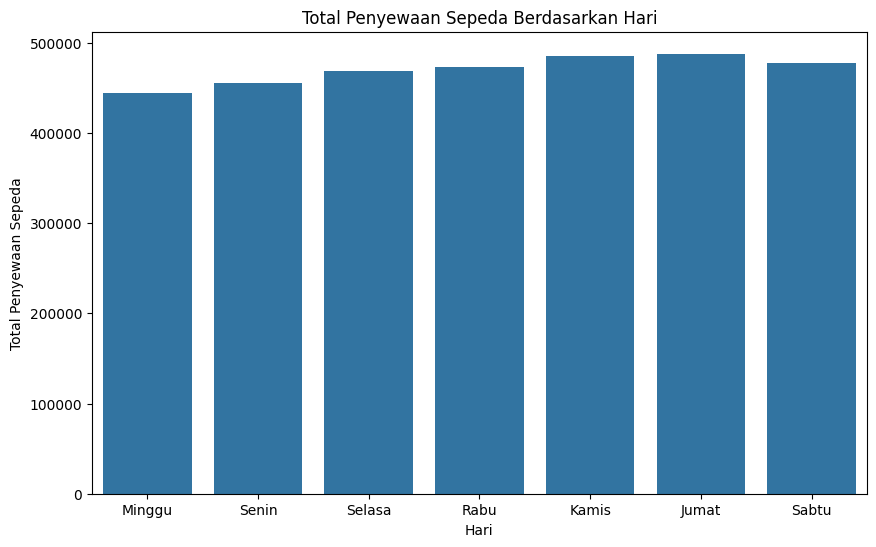

In [95]:
# Visualisasi penyewaan sepeda berdasarkan hari
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='count_total', data=weekday_rentals)
plt.title('Total Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

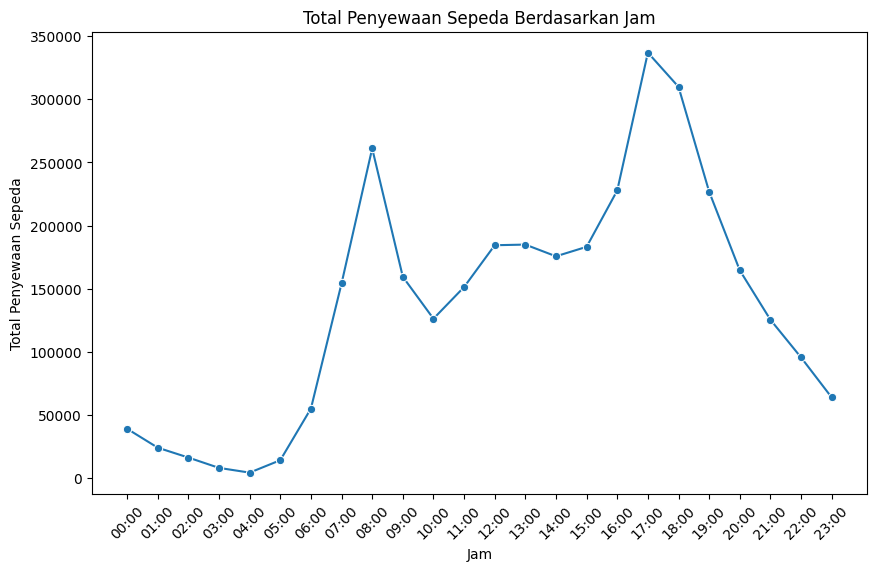

In [96]:
# Visualisasi penyewaan sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count_total', data=hourly_rentals, marker="o")
plt.title('Total Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

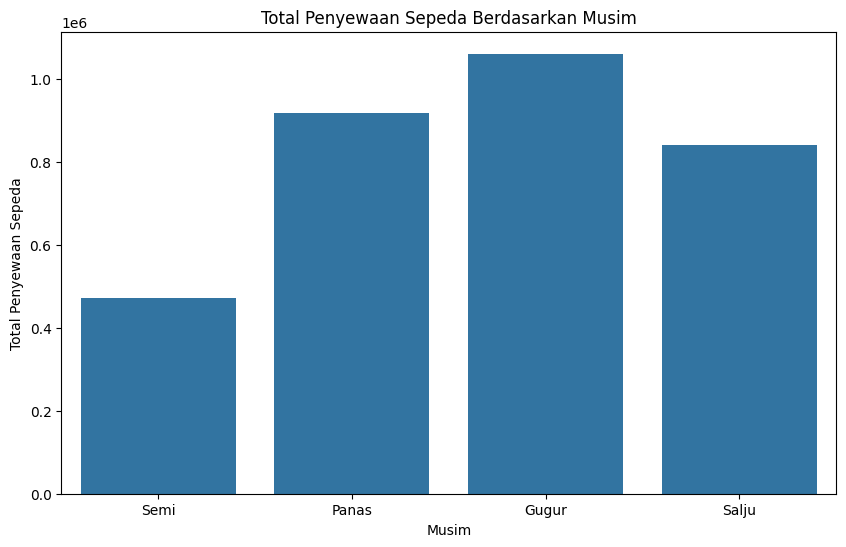

In [97]:
# Visualisasi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count_total', data=season_rentals, legend=False)
plt.title('Total Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

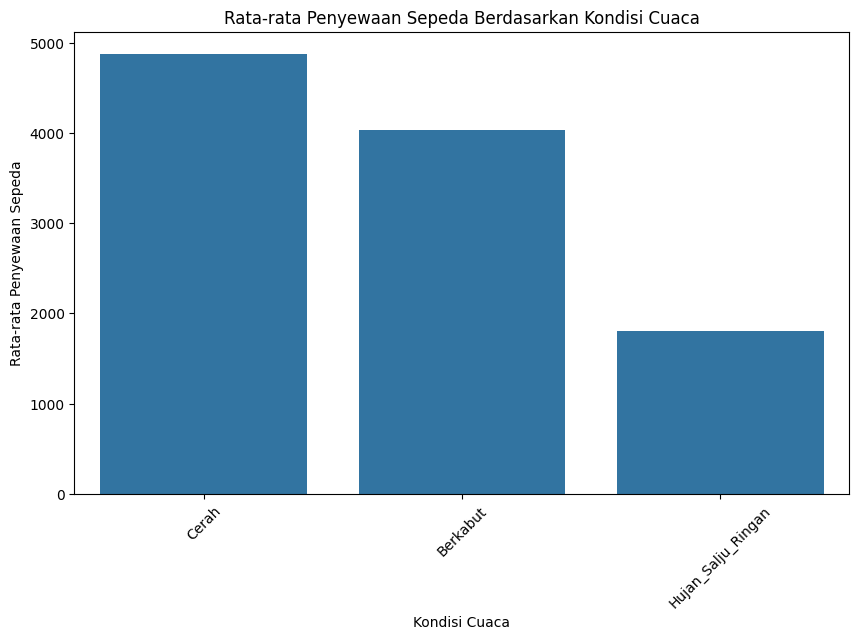

In [98]:
# Visualisasi rata-rata penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_situation', y='count_total', data=weather_rentals, legend=False)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()


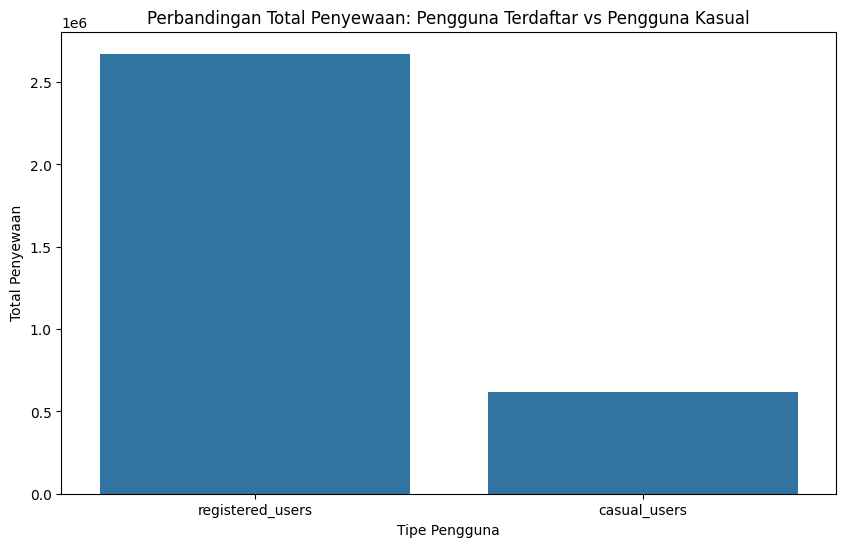

In [99]:
# Visualisasi perbandingan pengguna terdaftar dan kasual
plt.figure(figsize=(10, 6))
sns.barplot(x='user_type', y='total_rentals', data=subscription_rentals, legend=False)
plt.title('Perbandingan Total Penyewaan: Pengguna Terdaftar vs Pengguna Kasual')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Total Penyewaan')
plt.show()

In [100]:
# Clustering Analysis
def categorize_duration(duration):
    if duration <= 10:
        return 'Perjalanan Singkat'
    elif 10 < duration <= 30:
        return 'Perjalanan Menengah'
    else:
        return 'Perjalanan Panjang'

In [101]:
# Asumsi 'duration' adalah dalam menit dan dihitung dari 'count_total'
hour_df['duration'] = hour_df['count_total'] / 60  # Asumsi 1 count = 1 menit
hour_df['duration_category'] = hour_df['duration'].apply(categorize_duration)

# Analisis hasil clustering
cluster_stats = hour_df.groupby('duration_category').agg({
    'count_total': 'count',
    'duration': ['mean', 'median'],
    'temperature': 'mean'
})

cluster_stats.columns = ['count', 'duration_mean', 'duration_median', 'temperature_mean']
cluster_stats = cluster_stats.reset_index()

print("Statistik Cluster Durasi Perjalanan:")
print(cluster_stats)

Statistik Cluster Durasi Perjalanan:
     duration_category  count  duration_mean  duration_median  \
0  Perjalanan Menengah    665      11.972356        11.550000   
1   Perjalanan Singkat  16714       2.807010         2.233333   

   temperature_mean  
0         26.076692  
1         20.130729  


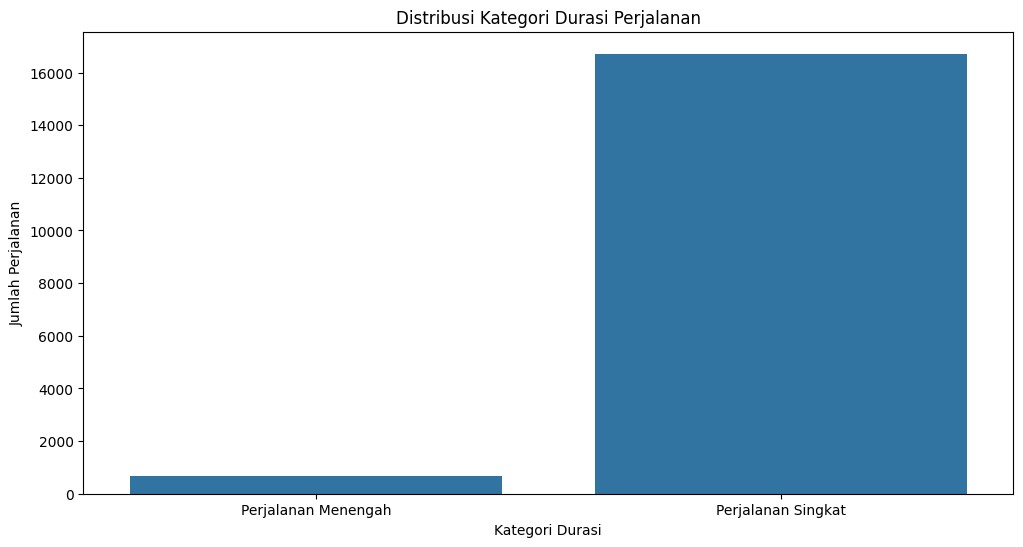

In [102]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.barplot(x='duration_category', y='count', data=cluster_stats)
plt.title("Distribusi Kategori Durasi Perjalanan")
plt.xlabel("Kategori Durasi")
plt.ylabel("Jumlah Perjalanan")
plt.show()

## Summary

### Interpretasi Hasil Clustering:
- Kategori perjalanan yang paling umum adalah Perjalanan Singkat.
- Rata-rata durasi perjalanan terpanjang terjadi pada kategori Perjalanan Menengah.
- Kategori Perjalanan Menengah memiliki rata-rata suhu tertinggi.

## Kesimpulan

1. Hari dengan penyewaan tertinggi adalah Jumat, terendah adalah Minggu.
2. Jam puncak penyewaan adalah pada pukul 17:00.
3. Musim paling populer adalah Gugur.
4. Korelasi antara suhu dan penyewaan sepeda: 0.63 yang dimana ada kaitanya dengan jumlah penyewa
5. Pengguna berlangganan lebih banyak dibandingkan pengguna yang tidak berlangganan.